# FCN

Fully Connected Network

## GPU Check

In [1]:
# # check available GPU in terminal: watch -d -n 0.5 nvidia-smi
# # select one GPU to train on:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="2"

## Imports

In [2]:
import sys, os

sys.path.insert(1, os.path.join(sys.path[0], '../modules'))
import notebook_loading

from FCN_Train import FCN_Train
from FCN_Data import *
from FC_Network import FC_Network

importing Jupyter notebook from FCN_Train.ipynb
importing Jupyter notebook from FCN_Data.ipynb
importing Jupyter notebook from FC_Network.ipynb


## Load and Setup Data

In [3]:
# extract the redundant baselines and their gains and data from miriad and calfits files
red_bls, gains, uvd = load_relevant_data('../zen_data/zen.2458098.58037.xx.HH.uv','../zen_data/zen.2458098.58037.xx.HH.uv.abs.calfits')

# seperate trining and testing redundant baselines 
# if we have not already done this, load them from disk
training_redundant_baselines_dict, testing_redundant_baselines_dict = get_or_gen_test_train_red_bls_dicts(red_bls, gains.keys())

# seperate the visiblites
training_baselines_data = get_seps_data(training_redundant_baselines_dict, uvd)
testing_baselines_data = get_seps_data(testing_redundant_baselines_dict, uvd)

## Trainer

In [4]:
trainer = FCN_Train()

In [5]:
trainer.add_data((training_baselines_data, training_redundant_baselines_dict),
                 (testing_baselines_data, testing_redundant_baselines_dict),
                 gains)

## Network

In [6]:
layer_nodes = [1024,768,512,256,128,64]
example_FCN_A = FC_Network(name = 'example_FCN_A', layer_nodes = layer_nodes)
example_FCN_A.print_params()

{'cost_name': 'MSE',
 'dtype': tf.float32,
 'g_shift': 0.01,
 'layer_nodes': [1024, 768, 512, 256, 128, 64],
 'learning_rate': 0.0001,
 'name': 'example_FCN_A',
 'num_freq_channels': 1024,
 'threshold': 0.00625}


## Train

In [7]:
trainer.network = example_FCN_A
trainer.num_epochs = 20 # quick example
trainer.model_save_interval = 5
trainer.train()

Training Finished


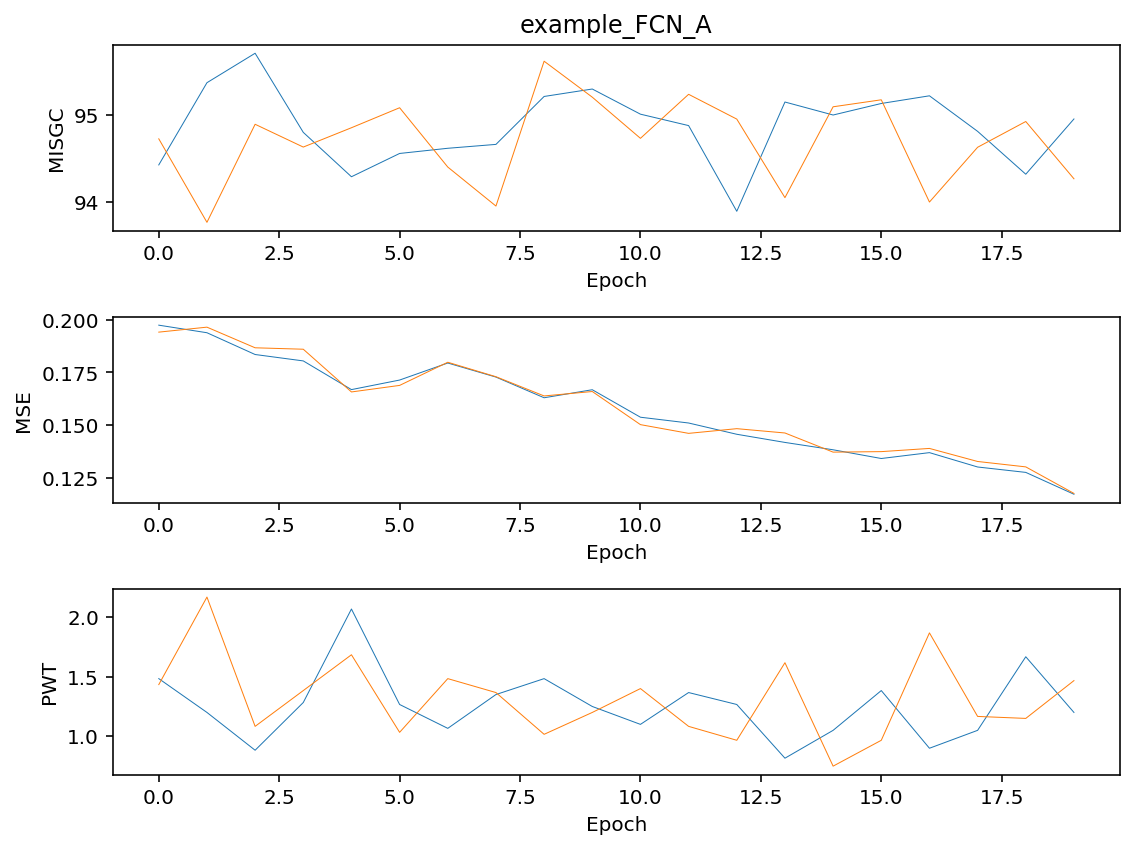

In [8]:
trainer.plot()